In [57]:
%matplotlib inline
from bs4 import BeautifulSoup
from html.parser import HTMLParser
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split

from datetime import datetime
import os
import os.path
import sys
import pickle
import pprint
import time
import urllib.request, urllib.parse, urllib.error
from urllib import request as urlrequest

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def ldf_display(df, lines=500):
    txt = ("<iframe " +
           "srcdoc='" + df.head(lines).to_html() + "' " +
           "width=1000 height=500>" +
           "</iframe>")

    return IPython.display.HTML(txt)

In [59]:
current_path = os.getcwd()
project_path = os.path.dirname(current_path)
print(project_path+"/data/cache")

/Users/moming2k/project/TradingProjects/HKHorseDB/data/cache


In [60]:
html_cache = project_path+"/data/cache"
save_path = project_path+"/data/race_records"
summary_path = project_path+"/data/race_summary"

In [61]:
def get_cache_path(url):
    url_path = urllib.parse.quote(url).replace('/', '_')
    file_path = "{}/{}".format(html_cache, url_path)
    return file_path

demo_url = get_cache_path("http://hk.racing.nextmedia.com/fullresult.php?date=20130206&page=05")
print(demo_url)

def is_cache_html(url):
    filepath = get_cache_path(url)
    if(os.path.isfile(filepath)):
        return True
    else:
        return False

/Users/moming2k/project/TradingProjects/HKHorseDB/data/cache/http%3A__hk.racing.nextmedia.com_fullresult.php%3Fdate%3D20130206%26page%3D05


In [62]:
def get_cache_html(url):
    filepath = get_cache_path(url)
    if(os.path.isfile(filepath)):
        print("url = {} exist in cache".format(url))
        with open(filepath, 'r') as io_file:
            html = io_file.read()        
        return html
    else:
        print("url = {} not exist in cache".format(url))
        return None

In [63]:
def acquire_total_race(date_str):
    url = 'http://hk.racing.nextmedia.com/fullresult.php?date={}&page=01'.format(date_str)

    if is_cache_html(url):
        html = get_cache_html(url)
    else:
        html = get(url)
        html = str(html, 'utf-8')
        set_cache_html(url, html)
        
    soup = BeautifulSoup(html, "html.parser")
    try:
        return len(soup.findAll('table')[1].findAll('tr')[0].findAll('td')[0].findAll('a', href=True))
    except Exception as err:
        return -1

def get_race_date_array():
    url = 'http://www.hkhorsedb.com/cseh/passodds.php'
    
    if is_cache_html(url):
        html = get_cache_html(url)
    else:
        html = get(url)
        html = str(html, 'big5')
        set_cache_html(url, html)
        
    soup = BeautifulSoup(html, "html.parser")
    tr_list = soup.findAll('table')[15].findAll('tr')[1:]
    
    race_date_array = []
    
    for i in range(0, len(tr_list)-1):
        tr = tr_list[i]
        tds = tr.findAll('td')
        
        for j in range(0, len(tds)):
            detail_date = tds[j].text
            
            if (detail_date != "-"):
                normal_data = ''.join(reversed(detail_date.split('-')))
                
                if(normal_data != ""):
                    race_date_array.append(normal_data)
    
    return race_date_array
    


In [64]:
use_cache_race_date_array = True

if use_cache_race_date_array:
    race_date_array = pickle.load( open( "race_date_array.p", "rb" ) )
else:
    race_date_array = get_race_date_array()
    pickle.dump( race_date_array, open( "race_date_array.p", "wb" ) )

print(race_date_array[0:10])
print(race_date_array[-10:])

['20170625', '20170621', '20170618', '20170614', '20170611', '20170607', '20170604', '20170531', '20170528', '20170524']
['20051120', '20051116', '20051113', '20051109', '20051105', '20051101', '20051030', '20051026', '20051022', '20051019']


In [65]:
race_date = race_date_array[0]

In [66]:
count = acquire_total_race(race_date)

url = http://hk.racing.nextmedia.com/fullresult.php?date=20170625&page=01 exist in cache


In [67]:
def create_csv_array():
    csv_array = []

    for race_date in race_date_array:
        for index in range(1, count+1):
            race_index = str(index).zfill(2)
            filename = '{}_{}'.format(race_date, race_index)
#             print(filename)
            csv_array.append(filename)

    return csv_array

In [68]:
use_cache_csv_array = True
csv_array = []

if use_cache_csv_array:
    csv_array = pickle.load( open( "race_csv_array.p", "rb" ) )
else:
    csv_array = create_csv_array()
    pickle.dump( csv_array, open( "race_csv_array.p", "wb" ) )
    
print(len(csv_array))
print(csv_array[0:20])
print(csv_array[-10:])

9530
['20170625_01', '20170625_02', '20170625_03', '20170625_04', '20170625_05', '20170625_06', '20170625_07', '20170625_08', '20170625_09', '20170625_10', '20170621_01', '20170621_02', '20170621_03', '20170621_04', '20170621_05', '20170621_06', '20170621_07', '20170621_08', '20170621_09', '20170621_10']
['20051019_01', '20051019_02', '20051019_03', '20051019_04', '20051019_05', '20051019_06', '20051019_07', '20051019_08', '20051019_09', '20051019_10']


In [69]:
def load_race_data_csv(race_date):
    filename = '{}/{}.cvs'.format(save_path,race_date)
    df=pd.read_csv(filename, sep=',',header=0)
    return df
#     print(df)
    
load_race_data_csv(csv_array[0])

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,...,WinOddBeforeGate,WinOdd,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
0,20170625,1,3,盛勢,4,韋達,132,8,39,葉,...,7.3,6.5,275.0,190.0,2.7,12 10 11,1,14.15 21.63 23.38 23.32,(1.22.48),頭馬
1,20170625,1,8,銘記心中,5,李寶利,121,2,28,吳,...,4.0,4.5,395.0,334.0,1.5,3 6 3,2,13.67 21.67 23.34 23.98,(1.22.66),1-1/4
2,20170625,1,2,葵涌老友,4,潘明輝,123,6,40,高,...,6.6,8.0,222.0,211.0,2.5,9 7 8,3,13.99 21.59 23.42 23.75,(1.22.75),1-3/4
3,20170625,1,11,電訊大炮,4,黃皓楠,108,1,19,徐,...,9.6,8.7,204.0,193.0,2.7,2 4 2,4,13.67 21.51 23.26 24.32,(1.22.76),1-3/4
4,20170625,1,6,金武士,5,何澤堯,122,9,31,方,...,11.0,13.0,130.0,121.0,4.3,7 9 9,5,13.83 21.83 23.42 23.86,(1.22.94),2-3/4
5,20170625,1,5,好準確,5,郭能,131,12,38,蘇,...,24.0,21.0,83.0,78.0,6.6,13 12 13,6,14.23 21.83 23.18 23.83,(1.23.07),3-3/4
6,20170625,1,1,架勢堂,3,祈普敦,133,14,40,摩,...,33.0,20.0,86.0,76.0,6.8,10 11 10,7,14.03 21.83 23.3 24.13,(1.23.29),5
7,20170625,1,12,飛壹般,4,楊明綸,111,10,18,李,...,29.0,19.0,92.0,105.0,4.9,11 13 12,8,14.07 21.99 23.18 24.34,(1.23.58),6-3/4
8,20170625,1,13,牛魔王,6,賴維銘,113,5,13,告,...,66.0,111.0,16.0,22.0,23.0,14 14 14,9,14.35 21.95 23.06 24.48,(1.23.84),8-1/2
9,20170625,1,7,勁伶利,4,潘頓,123,11,30,東,...,22.0,18.0,94.0,97.0,5.4,5 5 6,10,13.67 21.63 23.62 25.05,(1.23.97),9-1/4


In [70]:
def concat_pd_race_data():
    csv_pd_array = []
    for race_date in csv_array:
        try:
            csv_pd_array.append( load_race_data_csv(race_date))
        except Exception as err:
            print('missing data for race date {}', race_date)
    
    print(len(csv_pd_array))
    race_date_concat = pd.concat(csv_pd_array, ignore_index=True)
    return race_date_concat

In [71]:
# race_date_concat = pd.concat(csv_pd_array)

In [72]:
# print(race_date_concat[0:20])
# print(race_date_concat[-10:])
# print(race_date_concat)

In [73]:
use_cache_pd_array = True
pd_array = []

if use_cache_pd_array:
    pd_array = pickle.load( open( "race_date_concat.p", "rb" ) )
else:
    pd_array = concat_pd_race_data()
    print(pd_array)
    pickle.dump( pd_array, open( "race_date_concat.p", "wb" ) )

In [74]:
# print(pd_array[0:20])
# print(pd_array[-10:])
pd_array.head()

# pd_array.to_excel(os.path.join(summary_path, 'array.xlsx'), index=False)
# pd_array.to_csv(os.path.join(summary_path, 'array.cvs'), index=False)

# ldf_display(pd_array)

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,...,WinOddBeforeGate,WinOdd,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
0,20170625,1,3,盛勢,4,韋達,132,8,39,葉,...,7.3,6.5,275,190,2.7,12 10 11,1,14.15 21.63 23.38 23.32,(1.22.48),頭馬
1,20170625,1,8,銘記心中,5,李寶利,121,2,28,吳,...,4.0,4.5,395,334,1.5,3 6 3,2,13.67 21.67 23.34 23.98,(1.22.66),1-1/4
2,20170625,1,2,葵涌老友,4,潘明輝,123,6,40,高,...,6.6,8.0,222,211,2.5,9 7 8,3,13.99 21.59 23.42 23.75,(1.22.75),1-3/4
3,20170625,1,11,電訊大炮,4,黃皓楠,108,1,19,徐,...,9.6,8.7,204,193,2.7,2 4 2,4,13.67 21.51 23.26 24.32,(1.22.76),1-3/4
4,20170625,1,6,金武士,5,何澤堯,122,9,31,方,...,11.0,13.0,130,121,4.3,7 9 9,5,13.83 21.83 23.42 23.86,(1.22.94),2-3/4


### 1. Data Processing and Exploratory Data Analysis

### Show original data

In [119]:
pd.set_option('display.max_columns', None)
# with pd.option_context('display.max_rows', None, 'display.max_columns', 45):
#     pd_array.head(3)
    
pd_array.head(3)

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,DeclarHorseWt,WinOddBeforeNight,WinOddBeforeGate,WinOdd,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
0,20170625,1,3,盛勢,4,韋達,132,8,39,葉,1045,9.2,7.3,6.5,275,190,2.7,12 10 11,1,14.15 21.63 23.38 23.32,(1.22.48),頭馬
1,20170625,1,8,銘記心中,5,李寶利,121,2,28,吳,1136,3.4,4.0,4.5,395,334,1.5,3 6 3,2,13.67 21.67 23.34 23.98,(1.22.66),1-1/4
2,20170625,1,2,葵涌老友,4,潘明輝,123,6,40,高,1146,7.2,6.6,8.0,222,211,2.5,9 7 8,3,13.99 21.59 23.42 23.75,(1.22.75),1-3/4


### Numerical Data

In [75]:
pd_array.describe(percentiles=[0.5])

,WinOddBeforeNight,WinOddBeforeGate,WinOdd
count,106274.000000,106274.000000,106274.000000
mean,19.269059,25.692656,30.488548
std,17.028461,26.723408,41.111967
min,0.000000,0.000000,0.000000
50%,14.000000,15.000000,15.000000
max,99.000000,837.000000,915.000000


### Non-numerical Data

In [120]:
pd_array.describe(include=['O'])

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,DeclarHorseWt,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
count,106274,106274,106274,106274,106274,106274,106274,106274,106274,106274,106274,106274.0,106274.0,106274.0,106274,106274,87106,106274,106273
unique,924,10,14,5628,10,278,31,15,133,180,457,1570.0,811.0,3399.0,7218,33,86120,5727,317
top,20090701,6,1,奄尖大少,4,韋達,126,5,52,方,1084,9.0,16.0,1.7,1 1 1,1,0,(-),頭馬
freq,140,11879,8418,91,30573,6273,7589,8462,5157,6212,743,884.0,809.0,1977.0,2317,7318,855,1185,8424


### Missing values

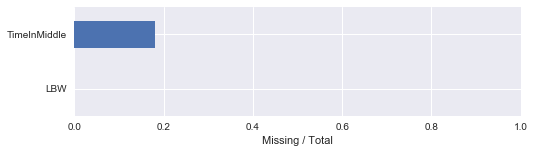

In [121]:
helper.missing(pd_array)

### Transform features

#### Enhance and add new features

In [122]:
df = pd_array.copy()  # modified dataset


def enhance_features(df, inplace=False):
    """ Enhance dataframe df """

    if not inplace:
        df = df.copy()
        
    # filter Cabin to first letter
#     df["Cabin"] = df["Cabin"].str[0]

    # get Title from Name
#     df['Title'] = df["Name"].str.extract('([A-Za-z]+)\.', expand=False)

    # remove low frequency values for the new feautres
    fields = ['Owner', 'JockeyName', 'HorseName']
    df.loc[:, fields] = helper.remove_lowfreq(df.loc[:, fields], show=False)

    df['isWin'] = (df['Place'] == 1)
    
    # Alone passenger
#     df['Alone'] = ((df["SibSp"] + df["Parch"]) == 0)
    
    if not inplace:
        return df


enhance_features(df, inplace=True)

### Delete irrelevant features

https://github.com/angelmtenor/data-science-keras/blob/master/titanic.ipynb

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [76]:
after_process = pd_array.copy()

dummy_fields = ['Draw']
for each in dummy_fields:
    dummies = pd.get_dummies(after_process[each], prefix=each, drop_first=False)
    after_process = pd.concat([after_process, dummies], axis=1)

fields_to_drop = [
    'ActualWt', 
                  'Rate',
                  'DeclarHorseWt', 
                  'Date', 
                  'HorseNo', 
                  'RaceNumber', 
                  'Age', 
                  'Draw',  
                  'HorseName', 
                  'JockeyName', 
                  'Owner', 
                  'WinOddBeforeNight', 
                  'WinOddBeforeGate', 
                  'WinInTenThousand', 
                  'PInTenThousand', 
                  'PlaceInMiddle', 
                  'TimeInMiddle', 
                  'FinishTime', 
                  'LBW', 
                  'P_Odd']
data = after_process.drop(fields_to_drop, axis=1)
data.head()

# len(data)

# data_new = data.drop(data[data.Place.dtype.kind == 'str'].index)

,WinOdd,Place,Draw_0,Draw_1,Draw_2,Draw_3,Draw_4,Draw_5,Draw_6,Draw_7,Draw_8,Draw_9,Draw_10,Draw_11,Draw_12,Draw_13,Draw_14
0,6.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4.5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,8.7,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [77]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 45):
    print(data[0:1])
    print(data[1:2])
    print(data[100:101])

   WinOdd Place  Draw_0  Draw_1  Draw_2  Draw_3  Draw_4  Draw_5  Draw_6  \
0     6.5     1       0       0       0       0       0       0       0   

   Draw_7  Draw_8  Draw_9  Draw_10  Draw_11  Draw_12  Draw_13  Draw_14  
0       0       1       0        0        0        0        0        0  
   WinOdd Place  Draw_0  Draw_1  Draw_2  Draw_3  Draw_4  Draw_5  Draw_6  \
1     4.5     2       0       0       1       0       0       0       0   

   Draw_7  Draw_8  Draw_9  Draw_10  Draw_11  Draw_12  Draw_13  Draw_14  
1       0       0       0        0        0        0        0        0  
     WinOdd Place  Draw_0  Draw_1  Draw_2  Draw_3  Draw_4  Draw_5  Draw_6  \
100    36.0     7       0       0       0       0       0       1       0   

     Draw_7  Draw_8  Draw_9  Draw_10  Draw_11  Draw_12  Draw_13  Draw_14  
100       0       0       0        0        0        0        0        0  


In [78]:
# pd_array.loc[pd_array['WinOdd'] < 2].loc[pd_array['WinOdd'] >1]

In [79]:
# print(data['WinOdd'].max())

### Clean up data

Before do the scaling, remove rows that contain invalid data. 

For Place, it is possible to contain "-" if it haven't finish the race. So we need to remove that.


In [80]:
# drop_target_array = []
# for index, row in data.iterrows():
#     print("index = {} , value = {}", index, row.Place)
#     if row.Place == '-':
#         drop_target_array.append(index)
        
# print(drop_target_array)

invalid_keyword = ['被貶', '5平頭馬', '4 併頭馬', '6併頭馬', '-']
for each in invalid_keyword:
    row_contain_invalid_data = data[data.Place==each].index.values
    data = data.drop(row_contain_invalid_data)
    
# Convert Number in String to integer
data.Place = pd.to_numeric(data.Place, errors='coerce')

# another way is use mapping to replace, but need to do it one by one
# df.replace({'set': mapping, 'tesst': mapping})

# print(len(data))

# s = pd.Series(data.Place.values)
# print(s.unique())

# data['Place'].mean()

# data[data.loc[data['Place'] == 1].index]['isWin'] = True

### Add a New field isWin based on Place to set isWin to True, else to False

In [81]:
data['isWin'] = False
data.loc[data['Place'] == 1,'isWin'] = True

### Filter out the improper case such as Win Odd that bigger than 20

In [82]:
# row_contain_invalid_data = data[data.WinOdd > 20].index.values
# data = data.drop(row_contain_invalid_data)

In [83]:
# data.plot.scatter(y='Place', x='WinOdd')

In [84]:
# data.loc[data['WinOdd'] < 2].loc[data['Place'] < 1]

In [85]:
# len(data)

In [86]:
# len(data.loc[data['WinOdd'] < 2])

In [87]:
# data.loc[data['WinOdd'] < 2,"Place"].plot.hist()

In [88]:
# data.loc[data['WinOdd'] > 2].loc[data['WinOdd'] < 5,['Place']].plot.hist()

In [89]:
# data.loc[data['WinOdd'] >= 5].loc[data['Place'] == 1]

In [90]:
# data.loc[data['WinOdd'] > 5].loc[data['WinOdd'] < 10,['Place']].plot.hist()

In [91]:
# data.loc[data['WinOdd'] > 10]

In [92]:
# data.loc[data['WinOdd'] > 10,['Place']].plot.hist()

In [93]:
# data.loc[data['WinOdd'] > 100,['Place']].plot.hist()

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [94]:
# data_mean = data['WinOdd'].mean()

In [95]:
# data_std = data['WinOdd'].std()

In [96]:
# data_min = data['WinOdd'].min()

In [97]:
# data_max = data['WinOdd'].max()

In [98]:
# data['Place'].mean()

In [99]:
# (20- (data_max-data_min)/2) /data_max

In [100]:
# from sklearn import preprocessing
# from keras.utils import np_utils

# # encode class values as integers
# encoder = preprocessing.LabelEncoder()
# encoder.fit(data['Place'])
# encoded_Y = encoder.transform(data['Place'])
# # convert integers to dummy variables (i.e. one hot encoded)
# final_categorical = np_utils.to_categorical(encoded_Y)

In [101]:
# final_categorical[1]

In [102]:
# a = 0/0

quant_features = [
#     'ActualWt', 
#     'Rate', 
#     'DeclarHorseWt', 
    'WinOdd', 
    'Place'
    ]
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    print(each)
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

WinOdd
Place


In [103]:
fields_to_drop = [
#     'ActualWt', 
#                   'Rate',
#                   'DeclarHorseWt'
]
data = data.drop(fields_to_drop, axis=1)
# data.head()

In [104]:
# 0/0
# Old version 

# quant_features = [
# #     'ActualWt', 
# #     'Rate', 
# #     'DeclarHorseWt', 
#     'WinOdd'#, 
# #     'Place'
#     ]
# # Store scalings in a dictionary so we can convert back later
# scaled_features = {}
# for each in quant_features:
#     print(each)
#     mean, std = data[each].mean(), data[each].std()
#     scaled_features[each] = [mean, std]
#     data.loc[:, each] = (data[each] - mean)/std

In [105]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', 45):
#     print(data[0:1])
#     print(data[1:2])

### Separate the Data to Feature set and Label set

Place is the final result that we want

In [106]:
# label_field = ['Place']
# drop_field = ['Place','WinOdd']

# # fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)

# features, labels = data.drop(drop_field, axis=1), data[label_field]


# Save the last 21 days 
test_data = data[-2000:]
data = data[:-2000]

# Separate the data into features and targets
target_fields = ['isWin']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
 
train_features, train_targets = features[:-20000], targets[:-20000]
val_features, val_targets = features[-20000:], targets[-20000:]

# labels /= 20

# x_train, x_test, y_train, y_test = train_test_split(features.as_matrix(), labels.as_matrix(), test_size=0.33, shuffle=False) #, random_state=seed)

# x_train /= 255
# test_data = data[-10000:]
# train_data = data[:-10000]

# test_features, test_labels = test_data.drop(label_field, axis=1), test_data[label_field]
# train_features, train_labels = train_data.drop(label_field, axis=1), train_data[label_field]


In [107]:
# print(features.as_matrix()[0])
# print(labels.as_matrix()[0])

# print(x_train[0])
# print(y_train[0])

### Encode the output

In [108]:
import keras

# One-hot encoding the output 
num_classes = 2
y_train = keras.utils.to_categorical(train_targets, num_classes)
y_test = keras.utils.to_categorical(test_targets, num_classes)
y_val = keras.utils.to_categorical(val_targets, num_classes)
print("Training set: \t x-shape = {} \t y-shape = {}".format(train_features.shape ,y_train.shape))
print("Validation set: \t x-shape = {} \t y-shape = {}".format(val_features.shape ,y_val.shape))
print("Test set: \t x-shape = {} \t y-shape = {}".format(test_features.shape ,y_test.shape))



Training set: 	 x-shape = (82981, 17) 	 y-shape = (82981, 2)
Validation set: 	 x-shape = (20000, 17) 	 y-shape = (20000, 2)
Test set: 	 x-shape = (2000, 17) 	 y-shape = (2000, 2)


In [109]:
# class TestCallback(Callback):
#     def __init__(self, test_data):
#         self.test_data = test_data

#     def on_epoch_end(self, epoch, logs={}):
#         x, y = self.test_data
#         loss, acc = self.model.evaluate(x, y, verbose=0)
#         print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 17)                306       
_________________________________________________________________
dropout_4 (Dropout)          (None, 17)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 36        
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Training ...
CPU times: user 2min 6s, sys: 1min 51s, total: 3min 57s
Wall time: 1min 51s


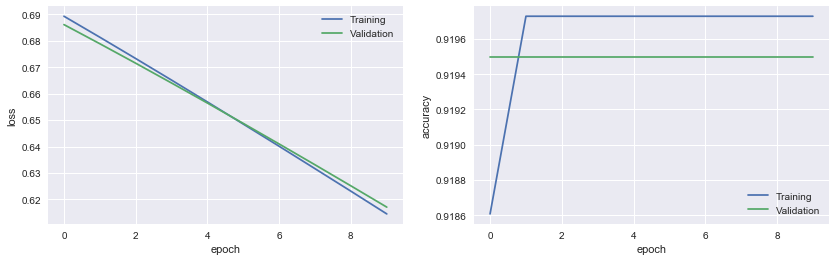


Training loss:  	0.6145
Validation loss: 	0.6171

Training accuracy: 	0.920
Validation accuracy:	0.919


In [110]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import Callback
import keras
import helper

train_features = np.array(train_features)
train_targets = np.array(train_targets)
val_features = np.array(val_features)
val_targets = np.array(val_targets)
test_features = np.array(test_features)

n_nodes = train_features.shape[1]

model = Sequential()
model.add(Dense(n_nodes, activation='relu', input_dim = train_features.shape[1]))
model.add(Dropout(.1))
# model.add(Dense(n_nodes//2, activation='relu'))
# model.add(Dropout(.1))

# If use normal value as Place
# model.add(Dense(1))

weights = keras.initializers.RandomNormal(stddev=0.00001)
# If use isWin
model.add(Dense(2,activation='softmax',
               kernel_initializer = weights,
               bias_initializer = 'zero'))

model.summary()

# If use normal value as Place
# model.compile(loss='mean_squared_error', optimizer='rmsprop')

# If use isWin
opt = keras.optimizers.adam(lr=0.000001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print("Training ...")
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0)]
# %time history = model.fit(train_features, train_targets, epochs=400, batch_size=1024, verbose=0, validation_data=(val_features, val_targets), callbacks=callbacks)

# %time history = model.fit(train_features, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(val_features, y_val), callbacks=callbacks)
%time history = model.fit(train_features, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(val_features, y_val), callbacks=callbacks)
helper.show_training(history)

# model = Sequential([
#     Dense(32, input_shape=(29,)),
#     Activation('relu'),
#     Dense(1),
#     Activation('sigmoid'),
# ])


In [111]:
score = model.evaluate(test_features, y_test, verbose=0)
print("Accuracy: {:.4f}".format(score[1]))

Accuracy: 0.9170


In [112]:
model.predict(test_features[0:10], batch_size=32)

array([[ 0.53609627,  0.46390375],
       [ 0.54077196,  0.45922807],
       [ 0.52160472,  0.47839525],
       [ 0.53869176,  0.46130821],
       [ 0.54134673,  0.4586533 ],
       [ 0.54139584,  0.4586041 ],
       [ 0.55169034,  0.44830966],
       [ 0.53949094,  0.46050912],
       [ 0.58714217,  0.41285783],
       [ 0.52759141,  0.47240865]], dtype=float32)

In [113]:
y_test[0:11]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])